<a href="https://colab.research.google.com/github/Pravalikagivaji02/Python_Project/blob/main/BANK_MARKETING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Objective: The classification goal is to predict if the client will subscribe a term deposit. By predicting it we can help the bank to make the work easier, productive, efficient and faster. Indirectly we can save their money.*
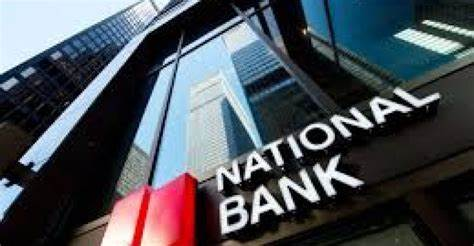

#**EXPLORATORY DATA ANALYSIS:**

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.

EDA is an important first step in any data analysis. Understanding where outliers occur and how variables are related can help one design statistical analyses that yield meaningful results. In biological monitoring data, sites are likely to be affected by multiple stressors. Thus, initial explorations of stressor correlations are critical before one attempts to relate stressor variables to biological response variables.  EDA can provide insights into candidate causes that should included in a causal assessment.
          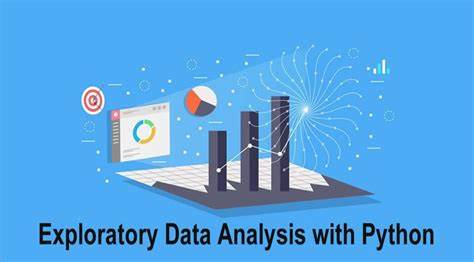

In [8]:
# impoerting required libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,50)

In [9]:
from google.colab import drive
drive.mount('/content/drive')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# importing the csv file
data=pd.read_csv("/content/bank-additional1.csv",sep=";")

In [11]:
data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [12]:
data.shape

(4119, 21)

In [13]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                  object
dtype: object

In [14]:
data.select_dtypes(include=['number']).count()

age               4119
duration          4119
campaign          4119
pdays             4119
previous          4119
emp_var_rate      4119
cons_price_idx    4119
cons_conf_idx     4119
euribor3m         4119
nr_employed       4119
dtype: int64

In [15]:
data.select_dtypes(include=['object']).count()

job            4119
marital        4119
education      4119
default        4119
housing        4119
loan           4119
contact        4119
month          4119
day_of_week    4119
poutcome       4119
y              4119
dtype: int64

In [16]:
data.select_dtypes(include=['number'])

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1


In [17]:
data.select_dtypes(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent,no
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent,no
4116,student,single,high.school,no,no,no,cellular,may,mon,failure,no
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent,no


# Conditional Analysis

In performing exploratory data analysis, it is important to be able to select subsets of data to perform analysis or comparisons.

How many of them subscribed and how many did not?

In [18]:
data[['y']].value_counts()

y  
no     3668
yes     451
dtype: int64

### **Which age group was frequently targeted**


In [19]:
data[['age']].value_counts()

age
32     216
31     191
30     177
34     174
35     172
      ... 
82       2
86       2
19       1
85       1
88       1
Length: 67, dtype: int64

**Observing Columns**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp_var_rate    4119 non-null   float64
 16  cons_price_idx  4119 non-null   float64
 17  cons_conf_idx   4119 non-null   f

In [21]:
for col in data.select_dtypes(include='object').columns:
  print(col, ':', data[col].unique())

job : ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['yes' 'no' 'unknown']
loan : ['no' 'unknown' 'yes']
contact : ['cellular' 'telephone']
month : ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week : ['fri' 'wed' 'mon' 'thu' 'tue']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [22]:
# finding missing data 
data.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

No missing data found

value counts() counts the number of unique values of the desired columns

In [24]:
data['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [25]:
data['marital'].value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [26]:
data['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

In [27]:
data['education'].value_counts()

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64

#**Categorical data**

exploring cateorical features within categorical features

In [28]:
for column in data.columns:
  print(column,' : ',data[column].nunique())


age  :  67
job  :  12
marital  :  4
education  :  8
default  :  3
housing  :  3
loan  :  3
contact  :  2
month  :  10
day_of_week  :  5
duration  :  828
campaign  :  25
pdays  :  21
previous  :  7
poutcome  :  3
emp_var_rate  :  10
cons_price_idx  :  26
cons_conf_idx  :  26
euribor3m  :  234
nr_employed  :  11
y  :  2


In [29]:
edu=data.education.unique()
edu

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [30]:
data.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [31]:
ages=data.age.unique()
ages

array([30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55,
       40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70])

In [32]:
data.sort_values(by='age')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
899,18,student,single,unknown,no,yes,yes,telephone,aug,wed,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6,no
477,18,student,single,unknown,no,no,no,cellular,sep,thu,...,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes
1661,18,student,single,unknown,no,yes,no,cellular,may,thu,...,1,7,2,success,-1.8,93.876,-40.0,0.677,5008.7,no
1887,19,student,single,high.school,unknown,yes,no,cellular,may,tue,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
3268,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,82,housemaid,married,basic.4y,no,no,no,telephone,sep,tue,...,3,3,2,success,-1.1,94.199,-37.5,0.877,4963.6,yes
1123,85,housemaid,divorced,basic.4y,unknown,yes,no,telephone,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,no
1796,86,retired,married,unknown,unknown,yes,no,cellular,sep,tue,...,1,999,0,nonexistent,-1.1,94.199,-37.5,0.877,4963.6,yes
696,86,retired,married,unknown,unknown,yes,yes,cellular,sep,tue,...,1,7,4,success,-1.1,94.199,-37.5,0.877,4963.6,yes


In [33]:
ages=data.sort_values(by='age').age.unique()
print(ages)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 80 81 82 85 86 88]


statistical representaion of data

In [34]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Graphs

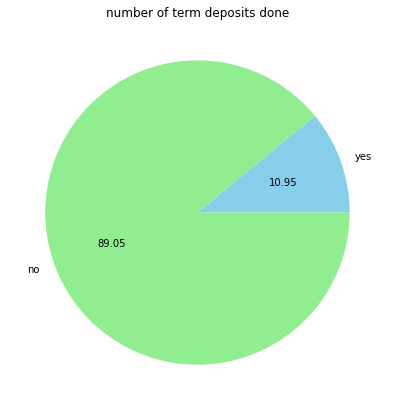

In [35]:
plt.figure(figsize=(7,7))
yes=data.loc[data['y']=='yes'].count()[0]
no=data.loc[data['y']=='no'].count()[0]
labels = ['yes' , 'no']
colors=['skyblue','lightgreen']
plt.pie([yes,no], labels = labels,colors=colors,autopct='%.2f')
plt.title('number of term deposits done')
plt.show()

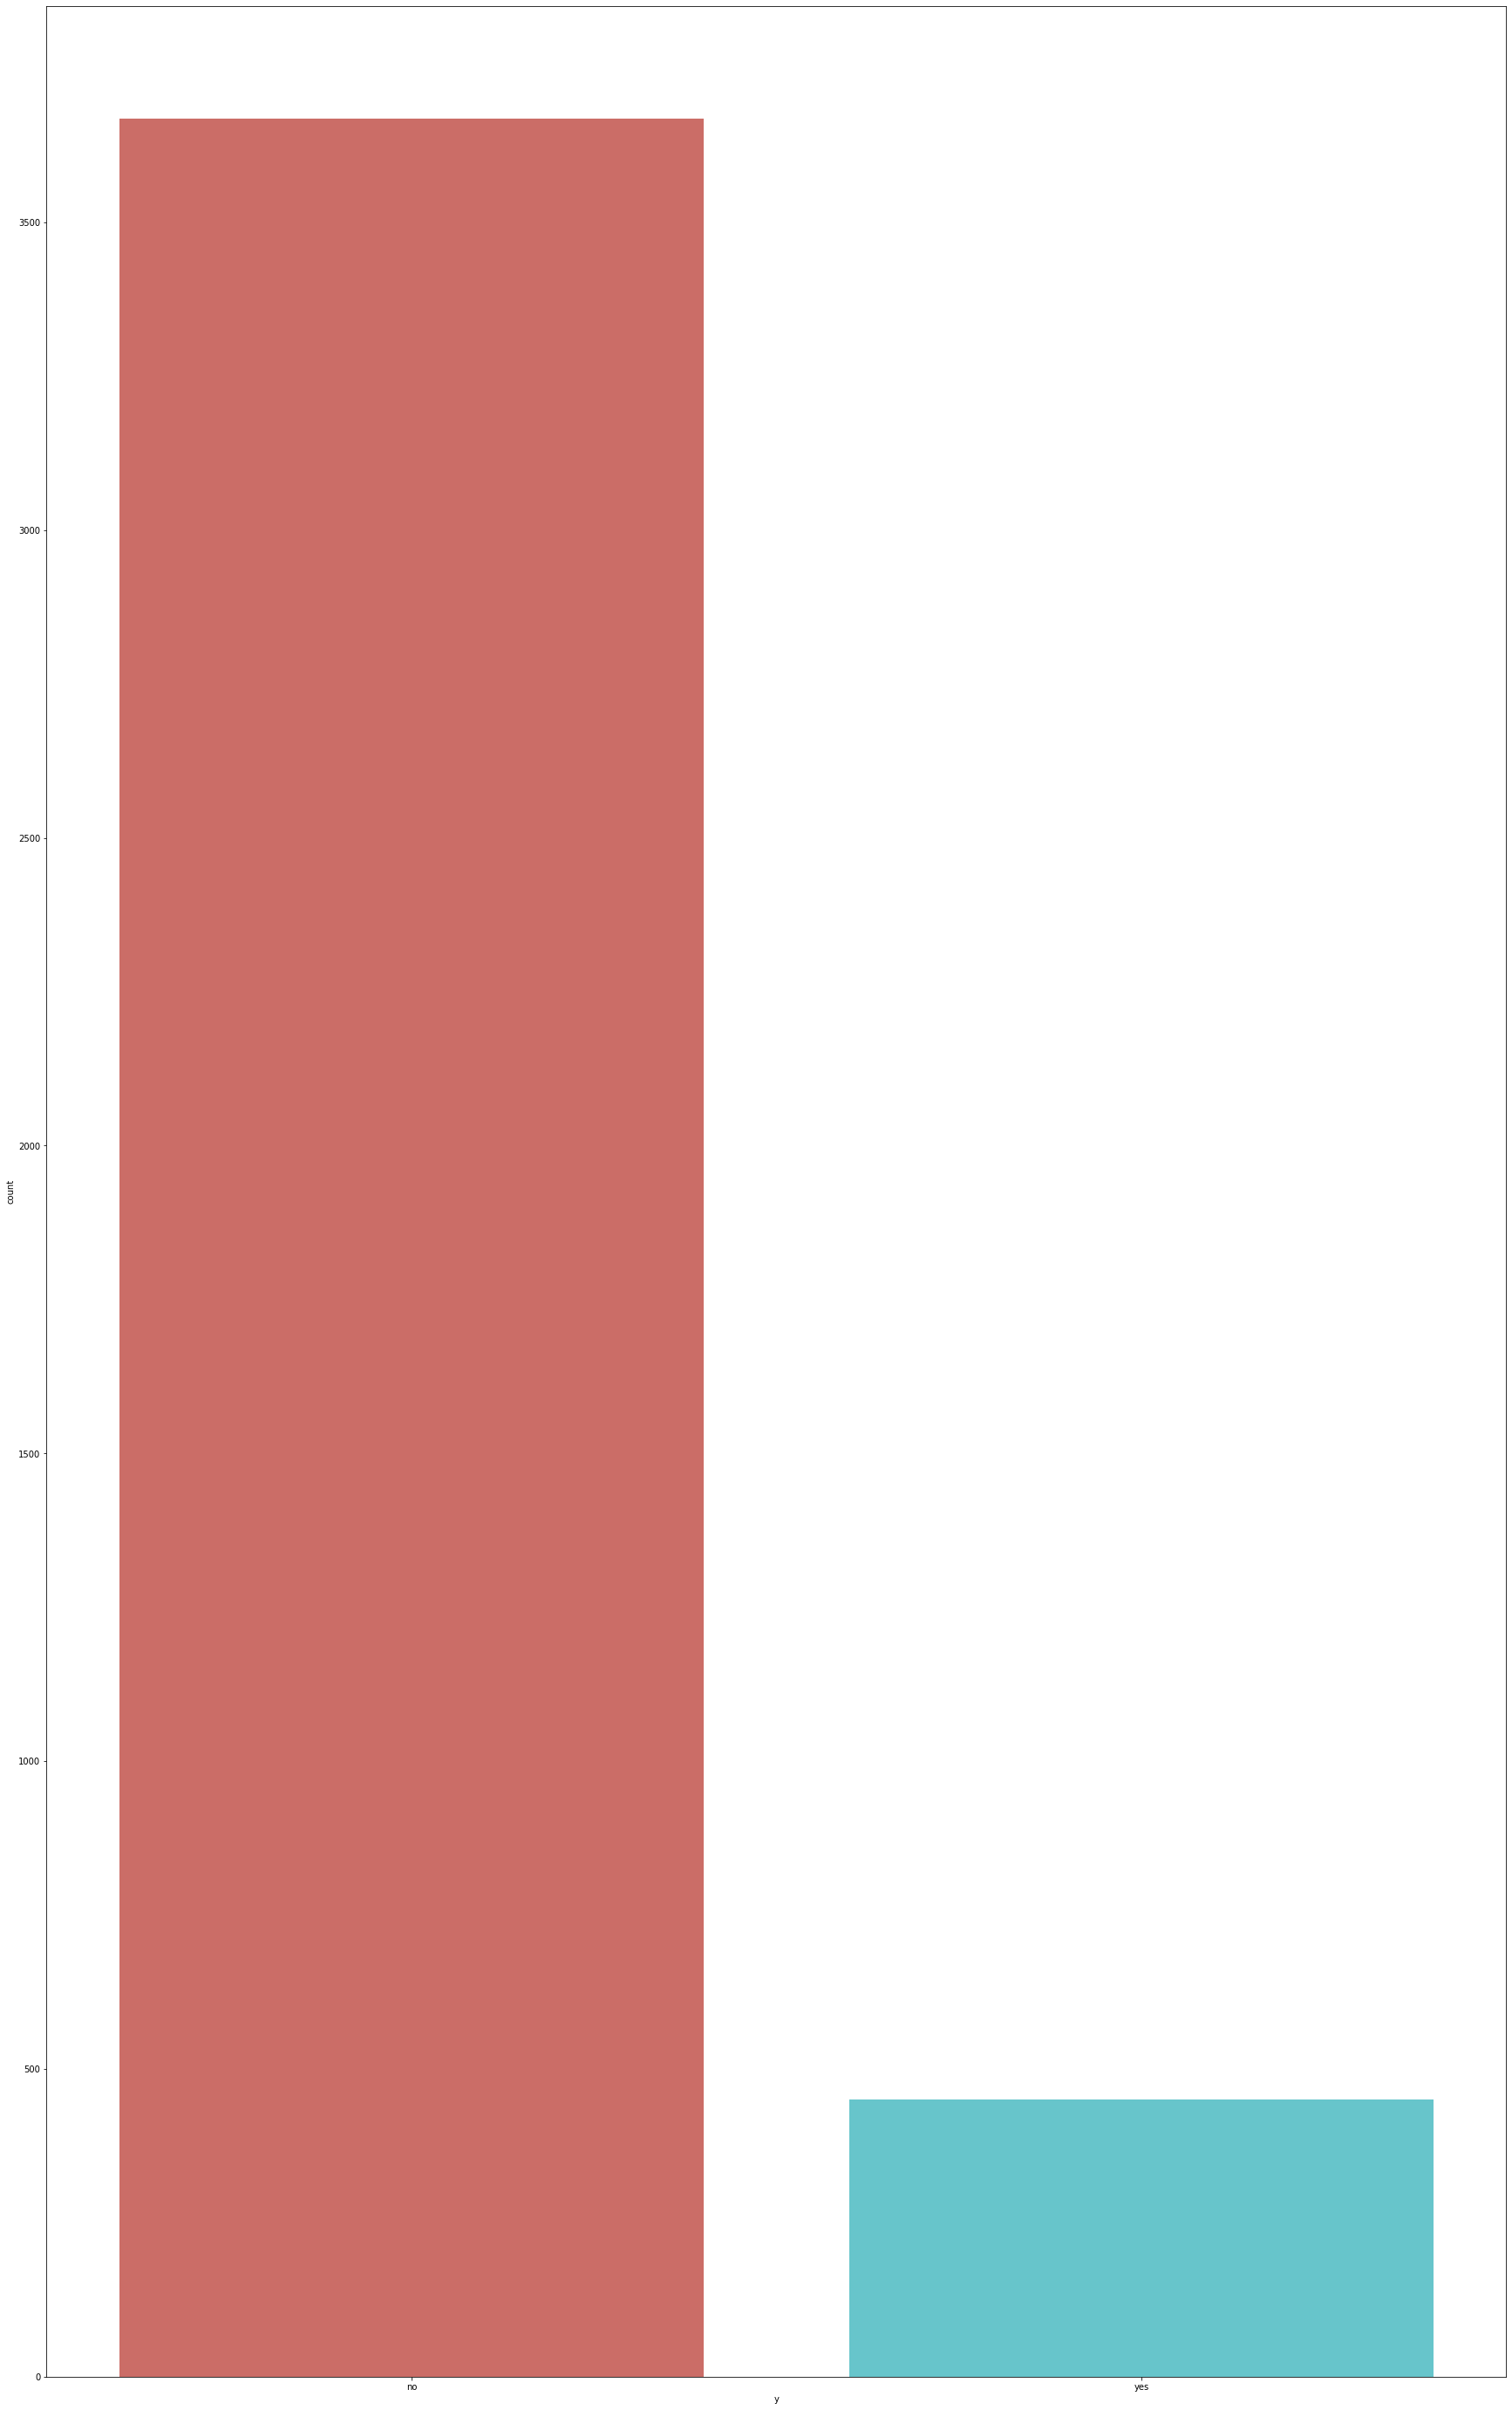

In [36]:
sns.countplot(x='y',data=data,palette="hls")

In [37]:
count_no_sub = len(data[data['y']=='no'])
count_sub = len(data[data['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 89.0507404709881
percentage of subscription 10.949259529011895


Most of the customers of the bank in this dataset are in the age range of 30–40.


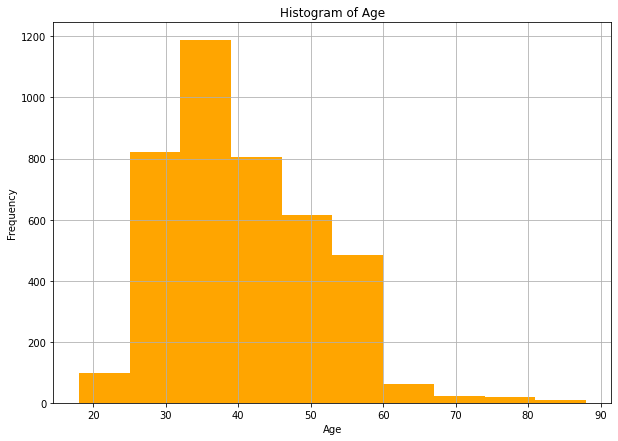

In [38]:
data.age.hist(color='orange',figsize=(10,7))
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

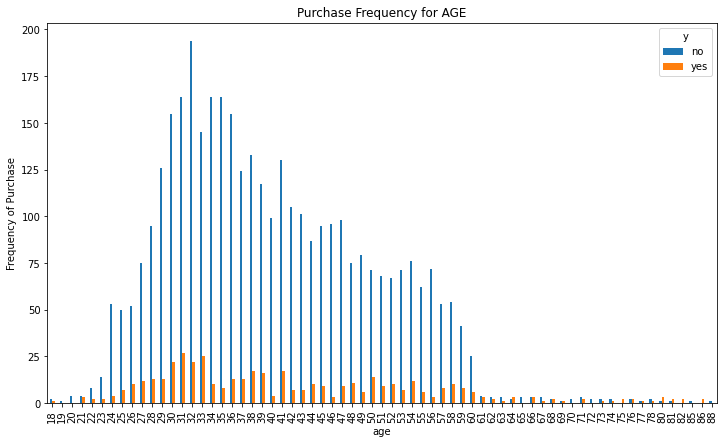

In [39]:
pd.crosstab(data.age,data.y).plot(kind='bar',figsize=(12,7))
plt.title('Purchase Frequency for AGE')
plt.xlabel('age')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_age')

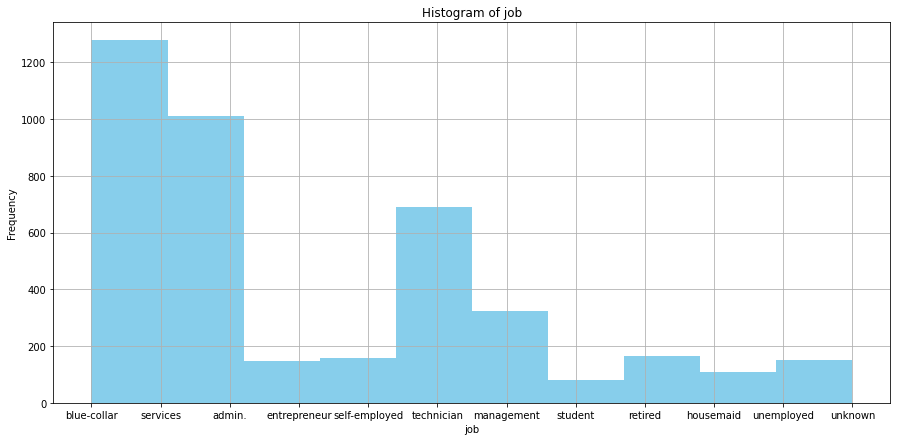

In [40]:
data.job.hist(color='skyblue',figsize=(15,7))
plt.title('Histogram of job')
plt.xlabel('job')
plt.ylabel('Frequency')
plt.savefig('hist_job')

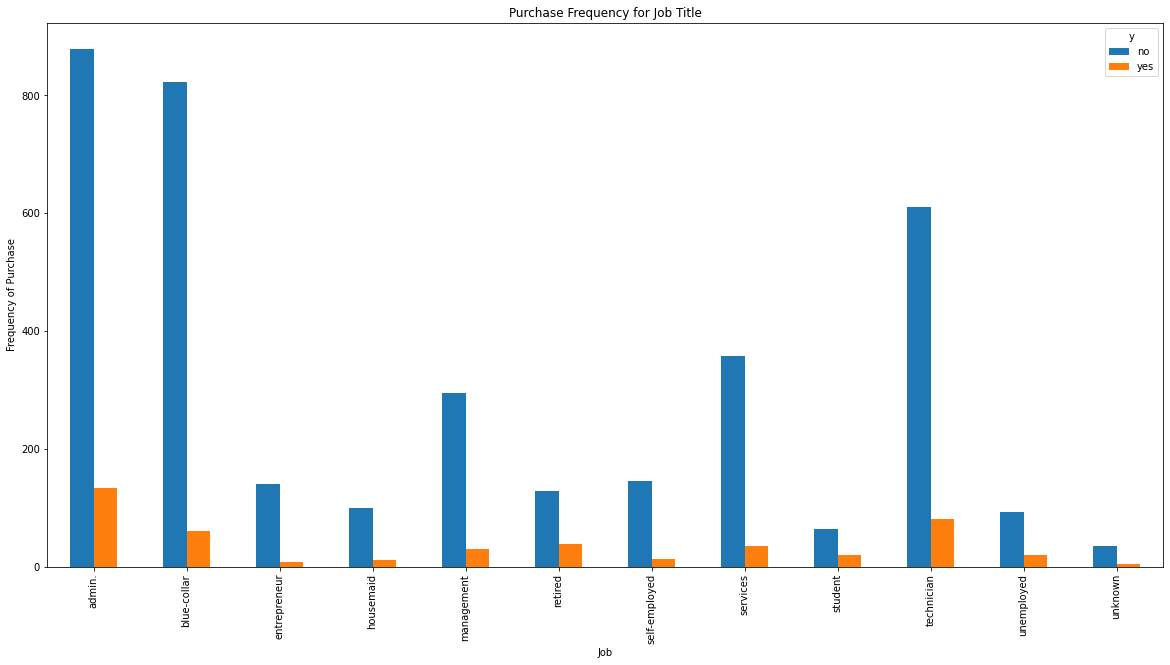

In [41]:
pd.crosstab(data.job,data.y).plot(kind='bar',figsize=(20,10))
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

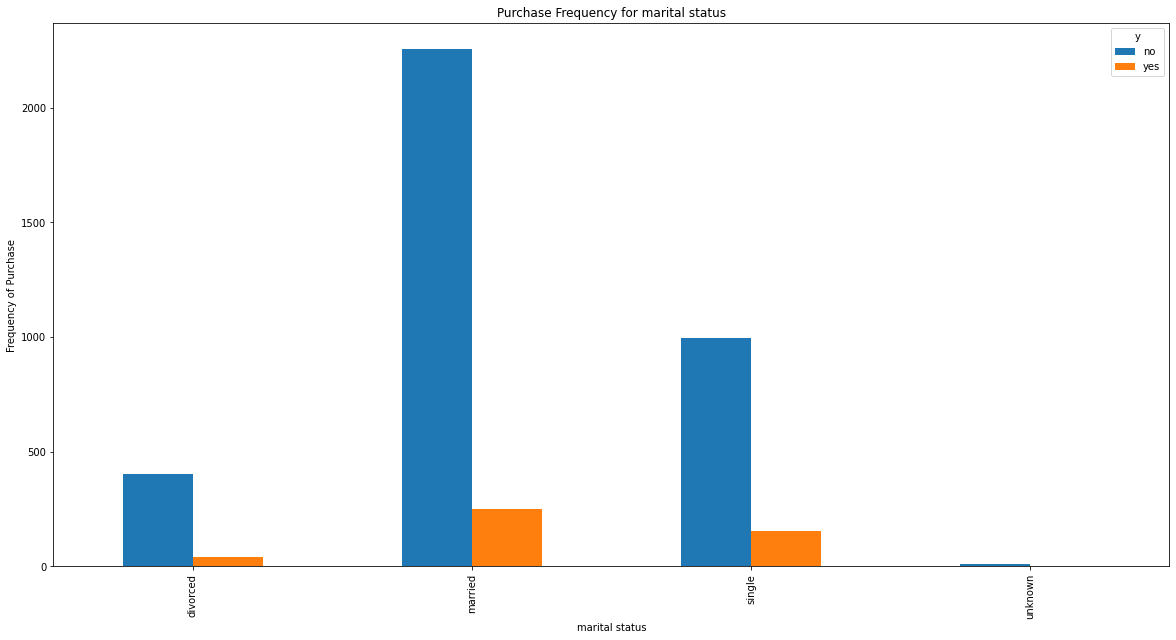

In [42]:
pd.crosstab(data.marital,data.y).plot(kind='bar',figsize=(20,10))
plt.title('Purchase Frequency for marital status')
plt.xlabel('marital status')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_marital')

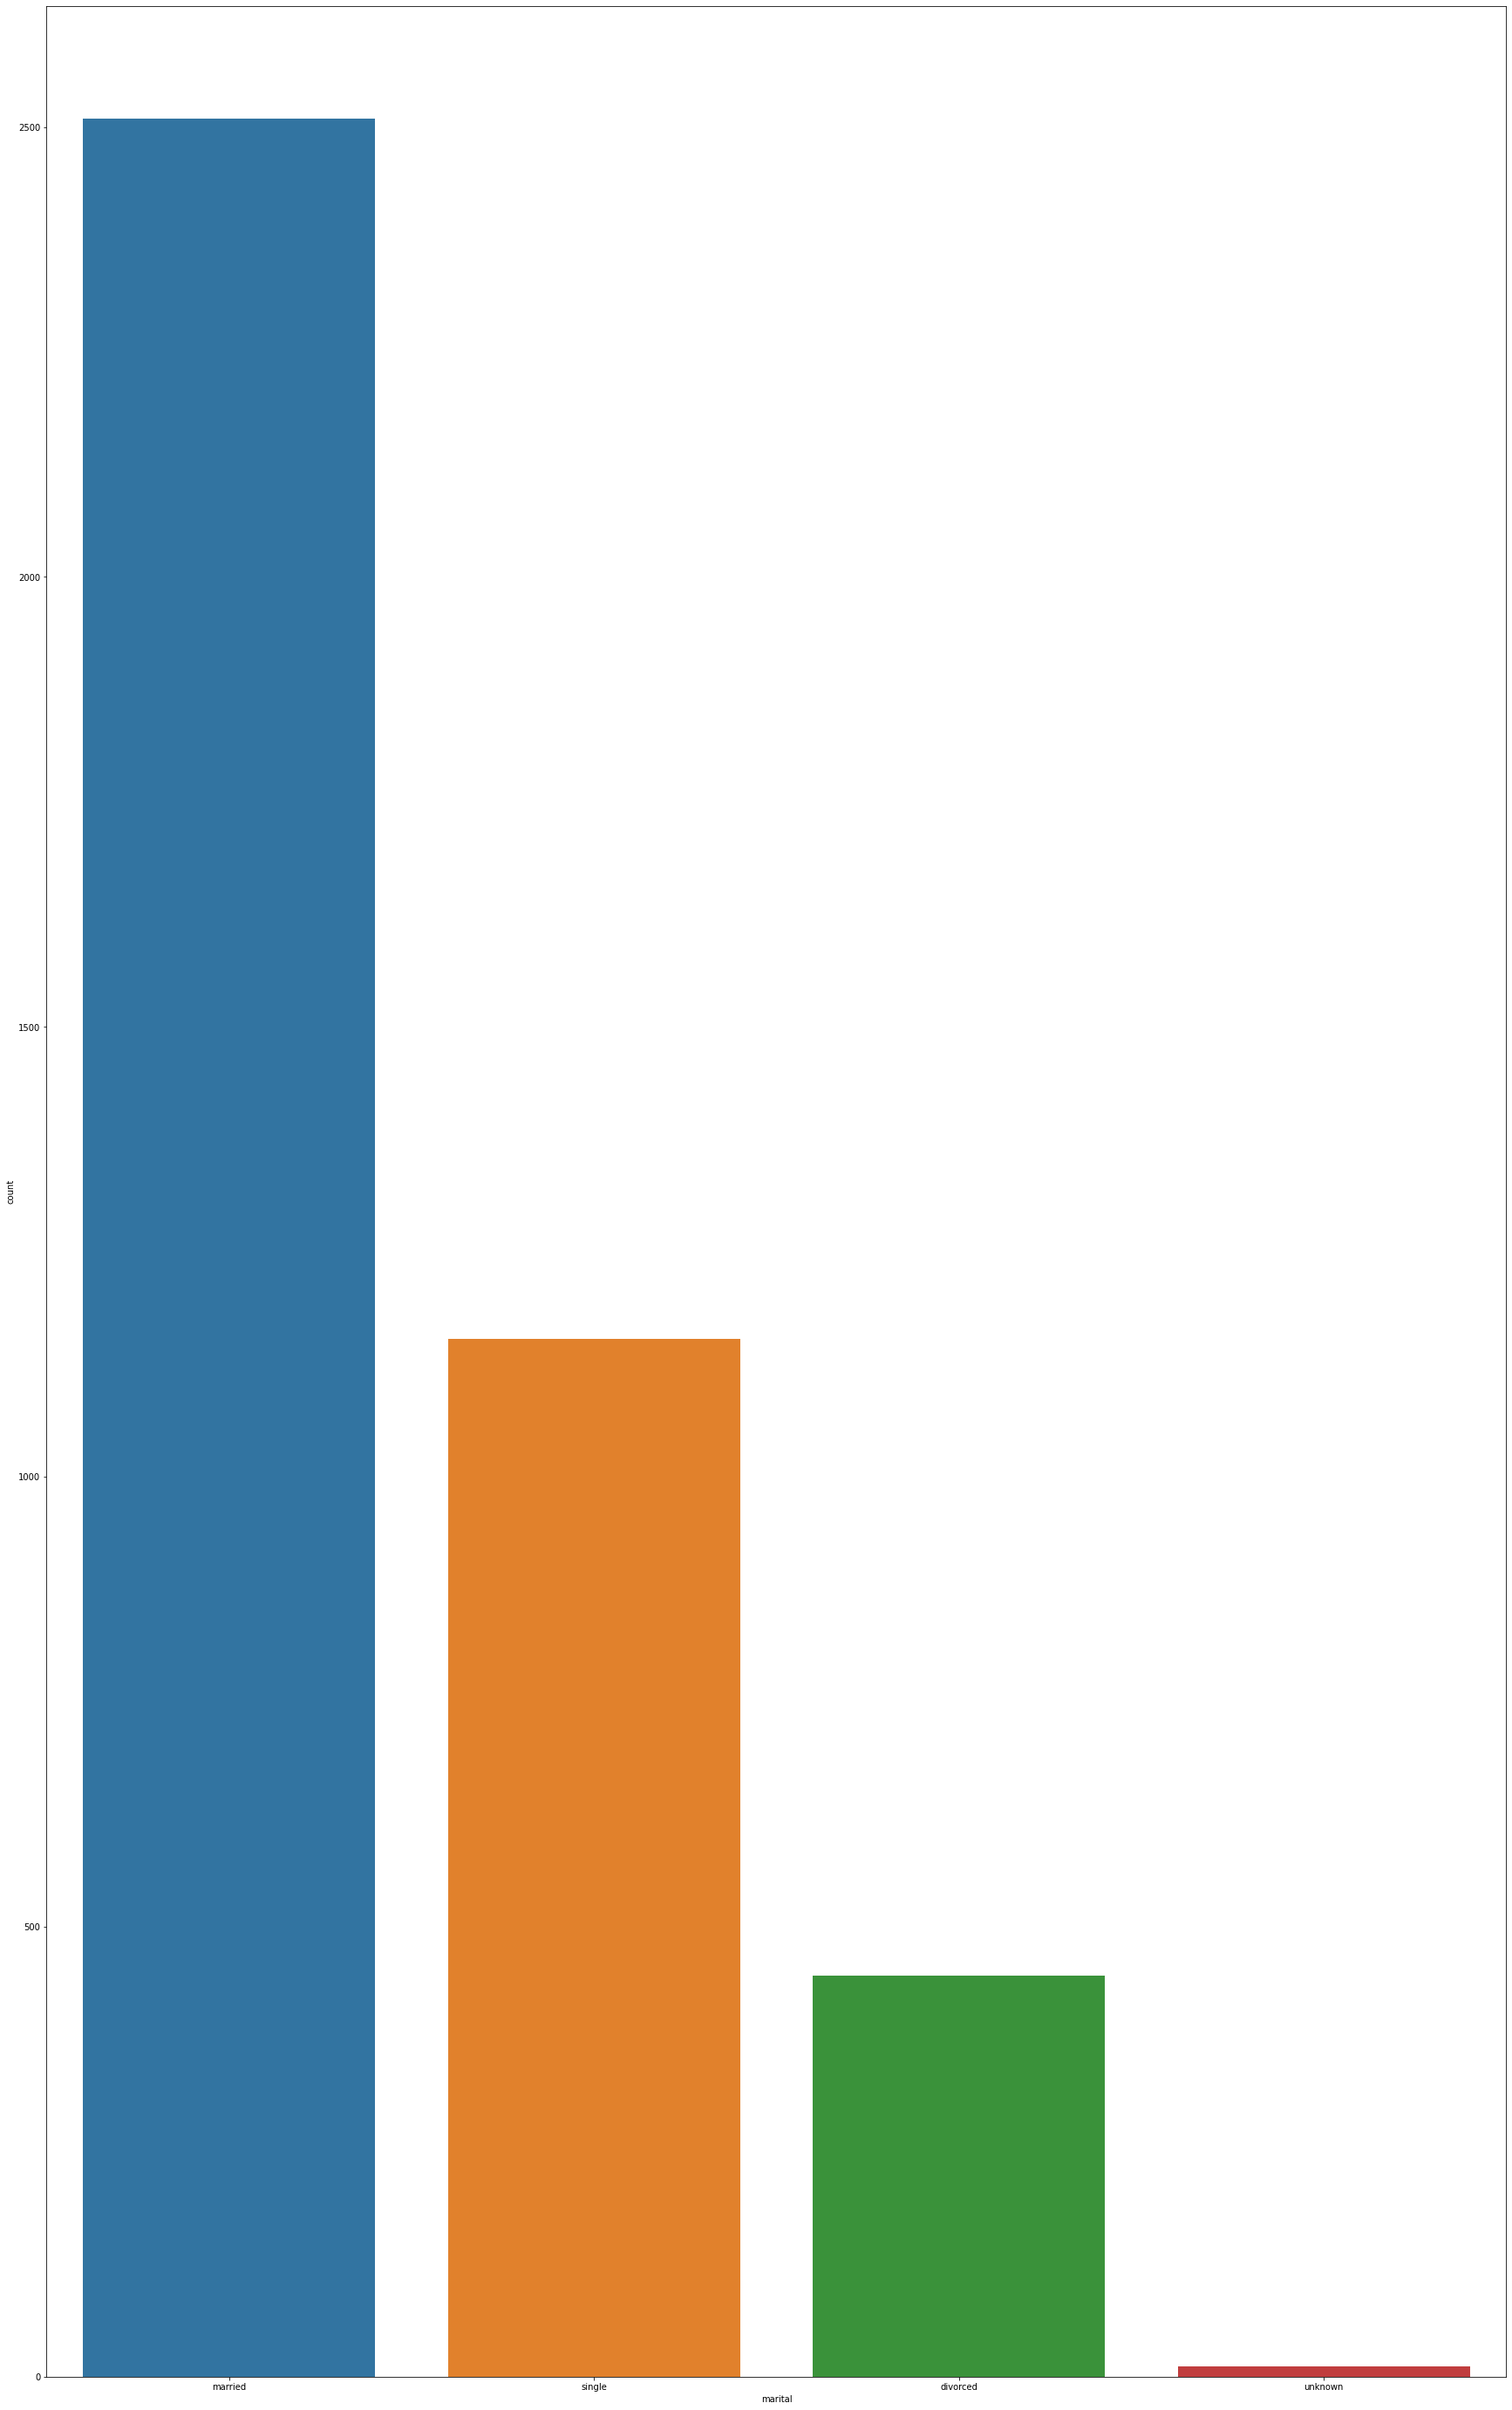

In [43]:
sns.countplot(x='marital',data=data)

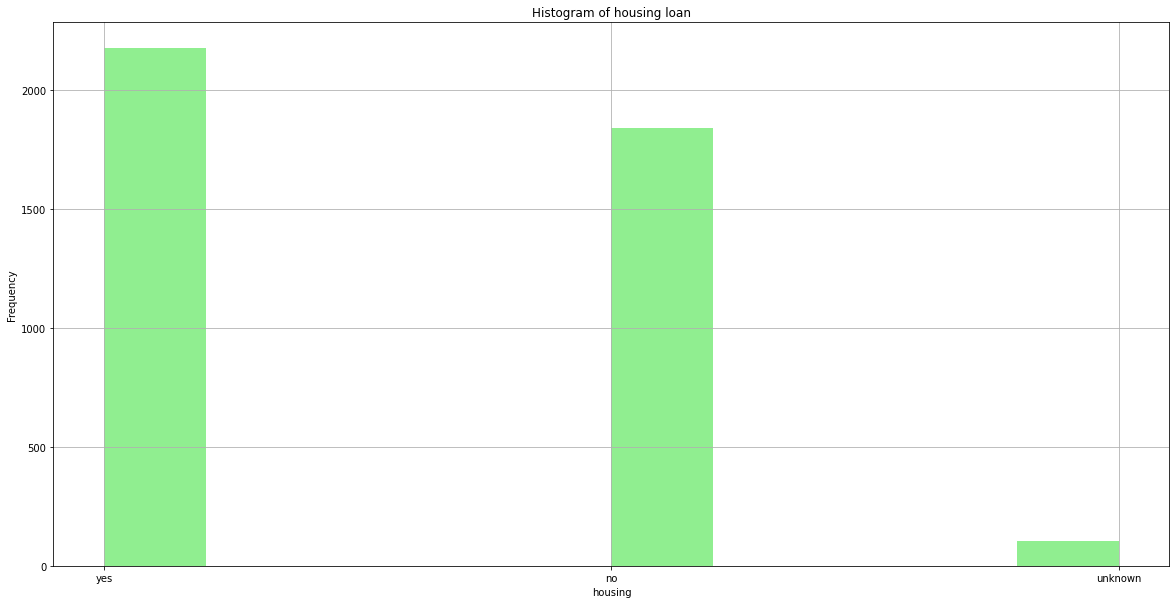

In [44]:
data.housing.hist(color='lightgreen',figsize=(20,10))
plt.title('Histogram of housing loan')
plt.xlabel('housing')
plt.ylabel('Frequency')
plt.savefig('hist_housing')

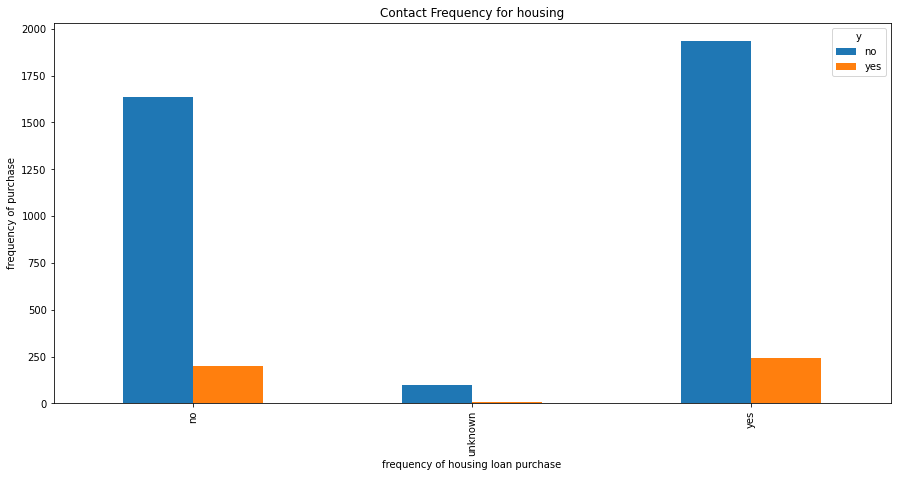

In [45]:
pd.crosstab(data.housing,data.y).plot(kind='bar',figsize=(15,7))
plt.title('Contact Frequency for housing')
plt.xlabel('frequency of housing loan purchase')
plt.ylabel('frequency of purchase')
plt.savefig('purchase_fre_housing')

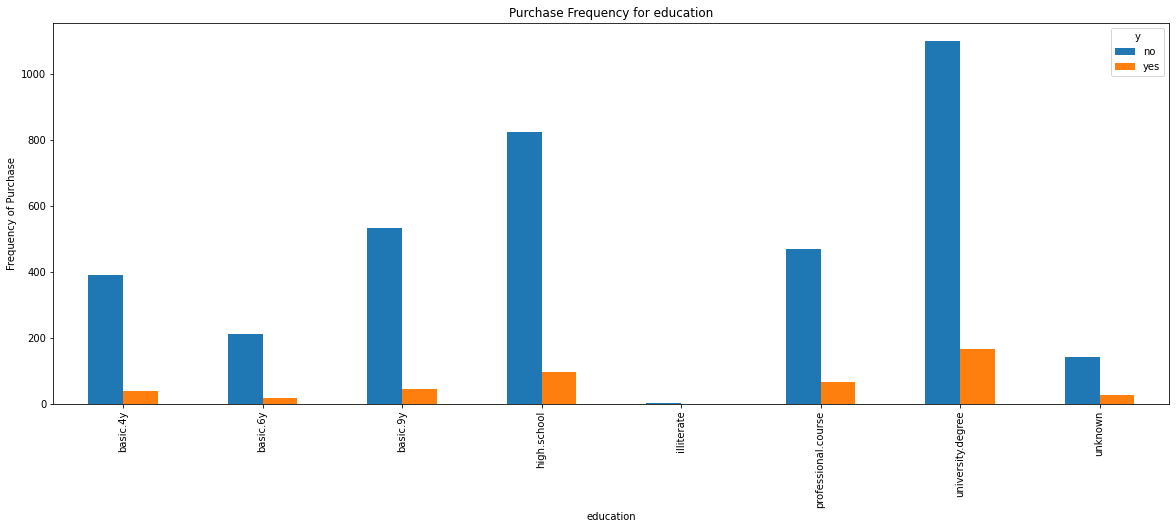

In [46]:
pd.crosstab(data.education,data.y).plot(kind='bar',figsize=(20,7))
plt.title('Purchase Frequency for education')
plt.xlabel('education')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_education')

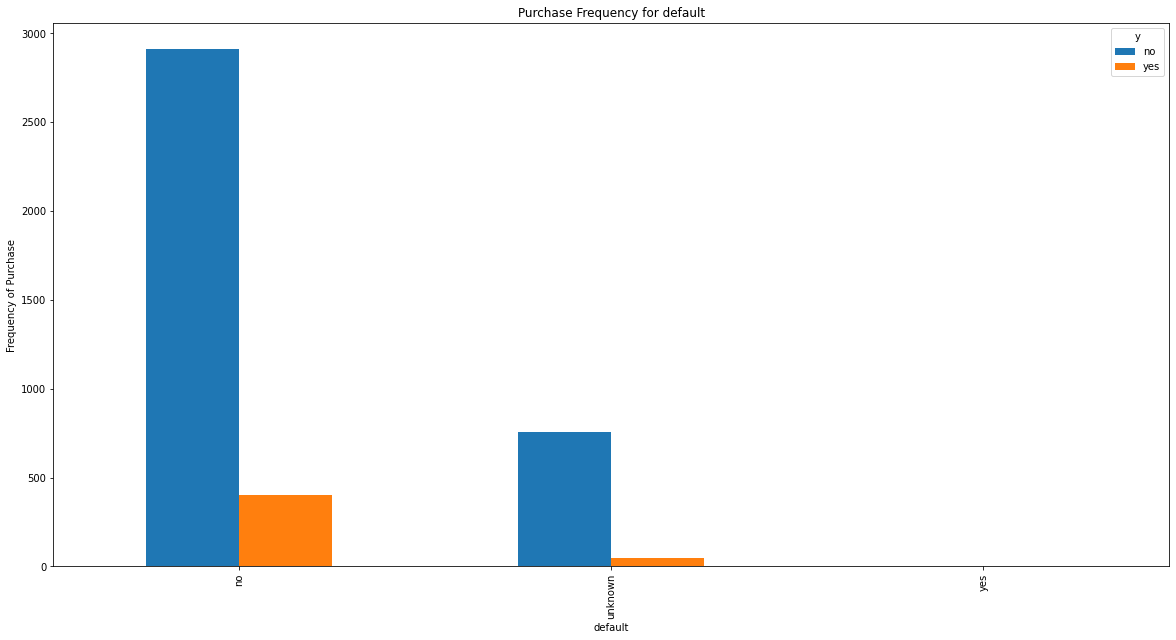

In [47]:
pd.crosstab(data.default,data.y).plot(kind='bar',figsize=(20,10))
plt.title('Purchase Frequency for default')
plt.xlabel('default')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_adefault')

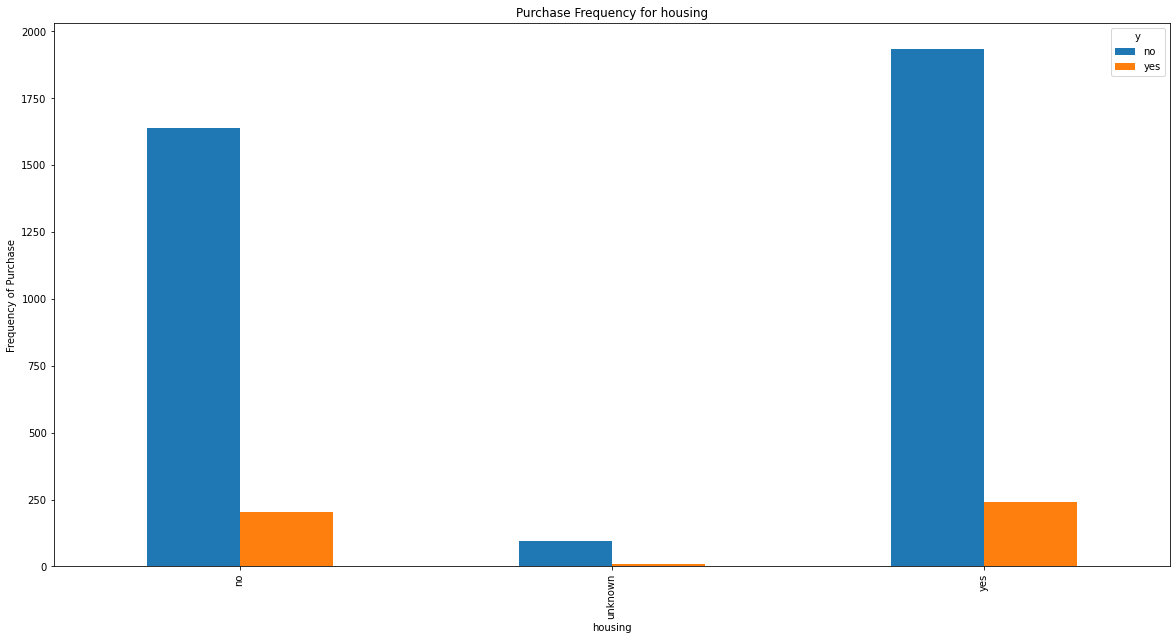

In [48]:
pd.crosstab(data.housing,data.y).plot(kind='bar',figsize=(20,10))
plt.title('Purchase Frequency for housing')
plt.xlabel('housing')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_housing')

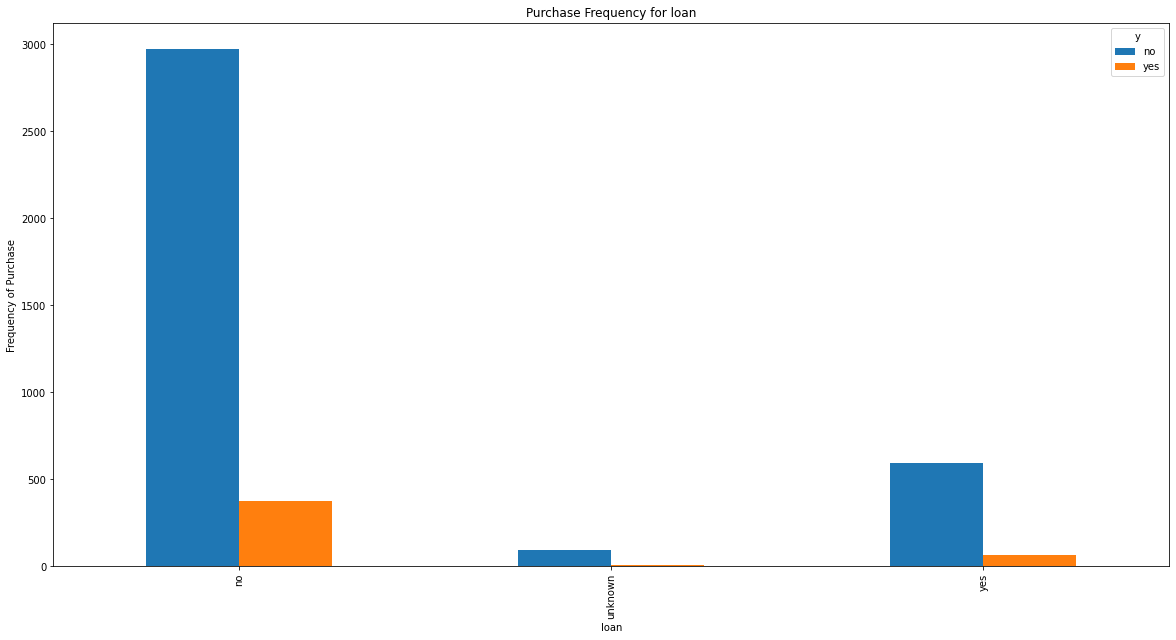

In [49]:
pd.crosstab(data.loan,data.y).plot(kind='bar',figsize=(20,10))
plt.title('Purchase Frequency for loan')
plt.xlabel('loan')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_loan')

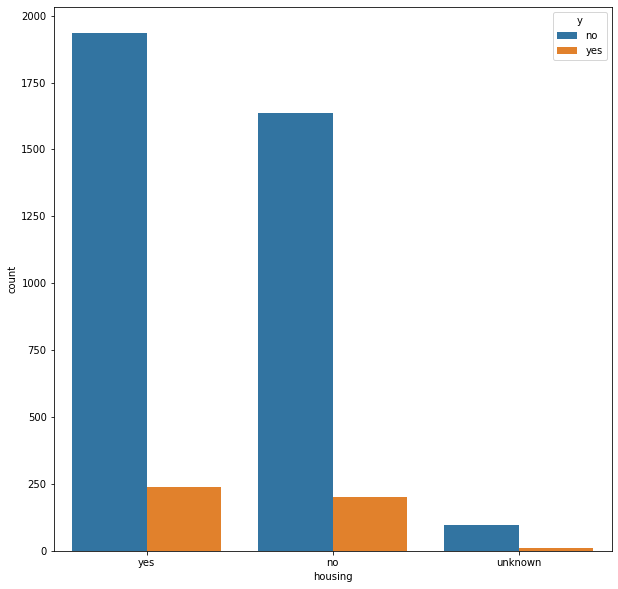

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(x='housing',hue='y',data=data)

In [51]:
corr=data.corr()
corr

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp_var_rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons_price_idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons_conf_idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr_employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


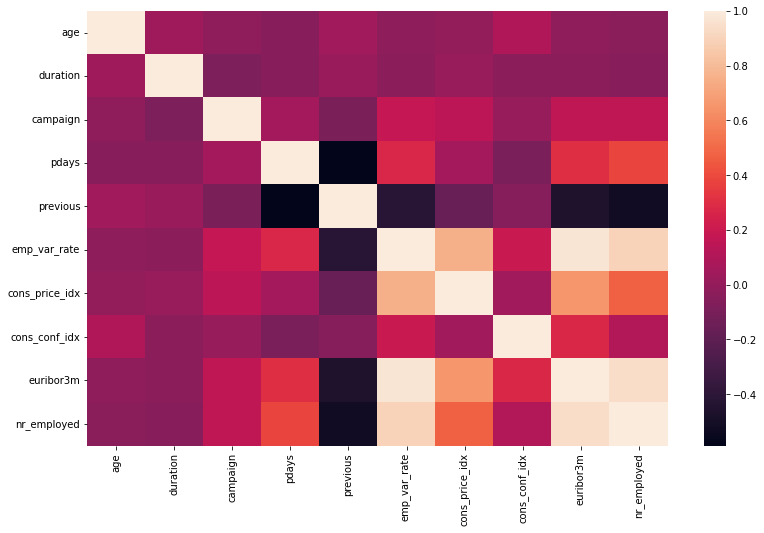

In [52]:
plt.figure(figsize=(13,8))
sns.heatmap(corr)

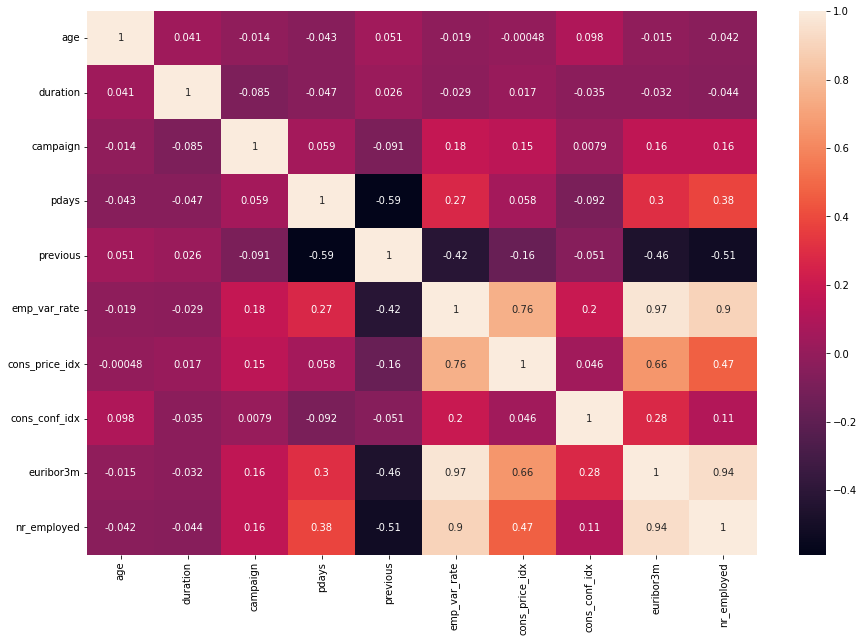

In [53]:
cor_mat=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor_mat,annot=True)

it seems no feature is heavily correlated

**Logistic Regression**

In [54]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
#converting ordinal data into numeric features
datamapping = {
    "yes":1,
    "no":0
}

In [58]:
 data['y_num']=data['y'].map(datamapping)
 data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,y_num
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0


In [59]:
x=data.iloc[:,:1]
x

,age
0,30
1,39
2,25
3,38
4,47
...,...
4114,30
4115,39
4116,27
4117,58


In [60]:
y=data.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y_num, Length: 4119, dtype: int64

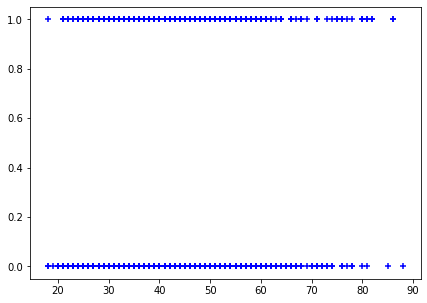

In [61]:
plt.figure(figsize=(7,5))
plt.scatter(data.age,data.y_num,marker='+',color='blue')

test = 0.3 and train = 0.7

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)  

In [63]:
len(x_train)

2883

In [64]:
x_test

,age
3754,46
45,39
2774,34
1170,24
4042,40
...,...
1728,32
1460,24
1363,72
1898,26


In [65]:
y_test

3754    0
45      0
2774    0
1170    0
4042    0
       ..
1728    0
1460    0
1363    0
1898    0
3519    1
Name: y_num, Length: 1236, dtype: int64

In [66]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

Predicting the test set results and calculating the accuracy

In [67]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [68]:
logreg.score(x_test,y_test)

0.901294498381877

In [69]:
predictions=logreg.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[1114    0]
 [ 122    0]]


The result is telling us that we have 1114+0 correct predictions and 122+0 incorrect predictions.

In [71]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.901294498381877

Compute precision, recall, F-measure and support
The precision is the ratio tp / (tp + fp)

*   The precision is the ratio tp / (tp + fp)
*   The recall is the ratio tp / (tp + fn)

*   The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall

In [72]:
y_pred = logreg.predict(x_test)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1114
           1       0.00      0.00      0.00       122

    accuracy                           0.90      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.81      0.90      0.85      1236



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


test = 0.2 and train = 0.8

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
logreg.score(x_test,y_test)

0.9077669902912622

In [76]:
predictions=logreg.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[748   0]
 [ 76   0]]


In [78]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.9077669902912622

In [79]:
y_pred = logreg.predict(x_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       748
           1       0.00      0.00      0.00        76

    accuracy                           0.91       824
   macro avg       0.45      0.50      0.48       824
weighted avg       0.82      0.91      0.86       824



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **k-fold**
KFold will provide train/test indices to split data in train and test sets. It will split dataset into k consecutive folds (without shuffling by default). Each fold is then used a validation set once while the k - 1 remaining folds form the training set (source).

In [81]:
print(cross_val_score(logreg,x,y,cv=5,scoring='accuracy').mean())

0.8905074378605388
